In [29]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [30]:
df = pd.read_csv('Iris_1.csv')

In [31]:
df

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df.describe()

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.isnull().sum(axis=0)

sepaloLargo    0
sepaloAncho    0
petaloLargo    0
petaloAncho    0
clase          0
dtype: int64

Dibujamos las cantidades de cada tipo de flor

<AxesSubplot:title={'center':'Balanceo de clases'}, xlabel='clase', ylabel='count'>

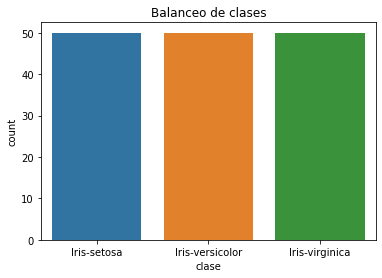

In [34]:
plt.title('Balanceo de clases')
sns.countplot(df['clase'])

Comparamos el ancho del sépalo y del pétalo de cada flor, para comprobar si existe relación

<AxesSubplot:xlabel='sepaloAncho', ylabel='sepaloLargo'>

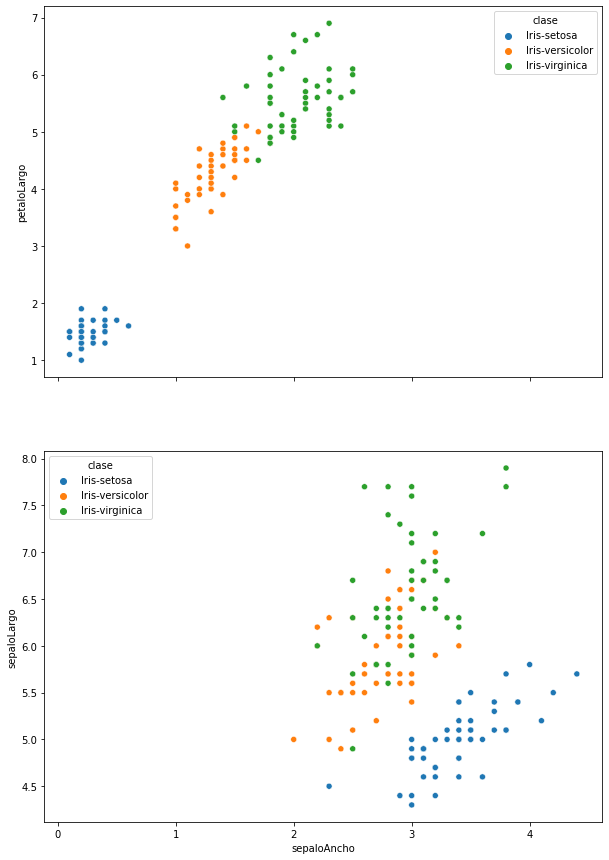

In [35]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.50, .50)},
                     figsize=(10, 15))

sns.scatterplot(df['petaloAncho'], 
                df['petaloLargo'],
                hue = df['clase'], ax=ax[0])

sns.scatterplot(df['sepaloAncho'], 
                df['sepaloLargo'],
                hue = df['clase'], ax=ax[1])

Probamos un algoritmo de clasificación

In [36]:
train, test = train_test_split(df, test_size = 0.30)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  105
Ejemplos usados para test:  45


Entrenamos un modelo de clasificación

In [37]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(train.drop(['clase'], axis=1), # eliminamos la columna clase para luego entrenarla 
        train['clase'])

KNeighborsClassifier(n_neighbors=8)

Realizamos una predicción sobre los datos de 'test' y colocamos el resultado en un dataframe, junto con la observación 'real'

In [38]:
prediccionKnn = knn.predict(test.drop(['clase'], axis=1))

comparacion = pd.concat([test['clase'].reset_index(),
                         pd.Series(prediccionKnn).reset_index(drop=True)], 
                         axis=1).set_index('index')

comparacion # unimos la clase real del dataset con la predicción que hicimos 

,clase,0
index,,
120,Iris-virginica,Iris-virginica
32,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
46,Iris-setosa,Iris-setosa
28,Iris-setosa,Iris-setosa
30,Iris-setosa,Iris-setosa
10,Iris-setosa,Iris-setosa
110,Iris-virginica,Iris-virginica
16,Iris-setosa,Iris-setosa


Obtenemos los registros en los que nuestro modelo ha fallado, y los añadimos a una nueva columna

In [39]:
comparacion['error'] = np.where((comparacion['clase'] != comparacion[0]), 1, 0)

comparacion['error'][comparacion['error'] == 1]

index
138    1
Name: error, dtype: int32

Obtenemos una métrica de accuracy (precisión)

In [40]:
comparacion['error'].value_counts()[1] *100 / (comparacion['error'].value_counts()[0] + comparacion['error'].value_counts()[1])

2.2222222222222223

Finalizada la clasificación, probamos un modelo de clusterizado sobre el mismo dataframe

Para ello, debemos retirar la columna 'clase' y dejar que sea el propio modelo estadístico el que busque diferencias importantes entre las flores observadas.

Retenemos, eso sí, las clases originales para después compararlo con nuestra predicción.

In [41]:
retenemos = df['clase']

df = df.drop(['clase'], axis = 1)
df

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Decidimos el número de clústeres óptimo
Gracias al método Elbow podemos decidir el número de clústeres óptimo, probando entre 1 y 10.

C:\Users\Windows\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


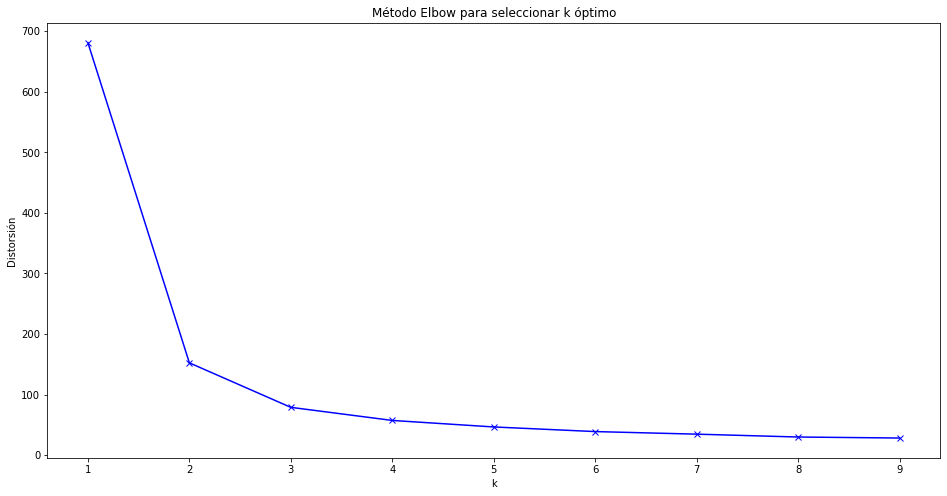

In [42]:
distorsion = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distorsion.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('Método Elbow para seleccionar k óptimo')
plt.show()

Tomamos la decisión de clusterizar en tres categorías distintas

Desgraciadamente, el modelo desconoce la nomenclatura 'setosa', 'versicolor'... por lo que en su lugar el modelo predecirá 0, 1 y 2 según cada categoría

In [43]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

df['kmeans'] = kmeanModel.predict(df)
df

,sepaloLargo,sepaloAncho,petaloLargo,petaloAncho,kmeans
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


KMeans sabe que las flores son diferentes, pero no sabe cual es el nombre de cada tipo
por lo que en el siguiente chunk 'traducimos' el número de clúster a su equivalente

In [44]:
df["kmeansNombre"] = df["kmeans"].apply(lambda x: 'Iris-setosa' 
                                        if x == 1 else ('Iris-virginica' 
                                                        if x == 0 else 'Iris-versicolor')) # 0-2

In [45]:
comparacionKmeans = pd.concat([df['kmeansNombre'].reset_index(),
                         retenemos.reset_index(drop=True)], 
                         axis=1).set_index('index')

comparacionKmeans

,kmeansNombre,clase
index,,
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-versicolor,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-versicolor,Iris-virginica


In [46]:
comparacionKmeans['error'] = np.where((comparacionKmeans['clase'] != comparacionKmeans['kmeansNombre']), 1, 0)

comparacionKmeans['error'][comparacionKmeans['error'] == 1]

index
50     1
51     1
53     1
54     1
55     1
      ..
143    1
144    1
145    1
147    1
148    1
Name: error, Length: 84, dtype: int32

<AxesSubplot:xlabel='petaloAncho', ylabel='petaloLargo'>

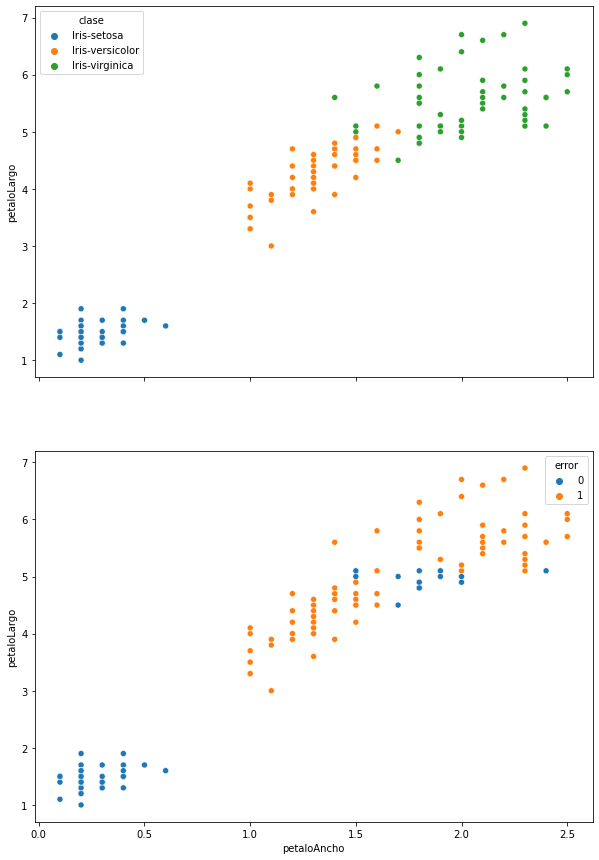

In [47]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.50, .50)},
                     figsize=(10, 15))

sns.scatterplot(df['petaloAncho'], 
                df['petaloLargo'],
                hue = retenemos, ax=ax[0])

sns.scatterplot(df['petaloAncho'], 
                df['petaloLargo'],
                hue = comparacionKmeans['error'], ax=ax[1])